In [8]:
import torch
from model import SimpleGraphNetwork
from dataset import GraphDataset

#model_name = 'model.pt'
#model = torch.load(model_name)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = SimpleGraphNetwork(6, 2)
#model = torch.load(model_name)
#model.load_state_dict(torch.load(model_name))
#model.eval()

100%|██████████| 5/5 [00:00<00:00, 31920.12it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done 35
Action tensor([-0.2800, -1.0000, -0.2400,  1.0000,  0.2500,  0.1500], device='cuda:0')
S2 pred out torch.Size([591, 2])


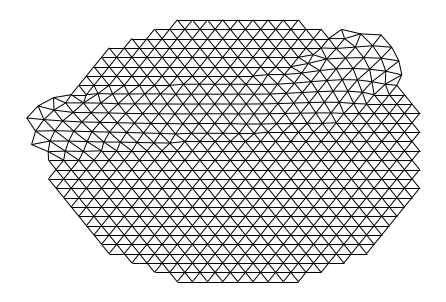

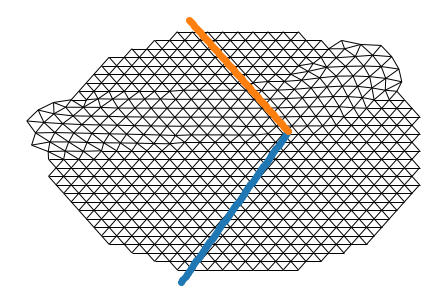

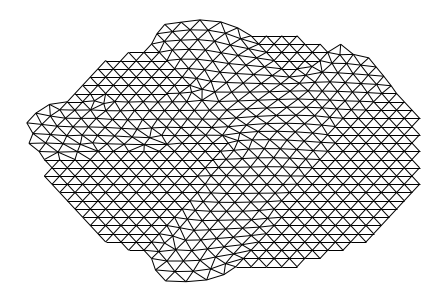

In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from model import SimpleGraphNetwork
%matplotlib inline

# Load the datasetn 
dataset = GraphDataset()

# Load an example
example_id = random.randint(0, len(dataset)-1)
#example_id = random.randint(0, len(dataset)-1)
#example_id = 1
s1, s2 = dataset[example_id]

s1 = s1.to(device)
s2 = s2.to(device)

s1.x = (s1.x / 100.0)
s2.x = (s2.x / 100.0)

print("Action", s1.x[0, 2:])
action = s1.x[0, 2:].cpu().data.numpy()

# Do forward prediction
model = torch.load('model.pt')
s2_pred = model(s1)
print("S2 pred out", s2_pred.shape)

def visualize(points, edge_index, action=None):
    plt.figure()
    points_np = points[:, :2].cpu().data.numpy()
    point_match = {tuple(p) : i for i, p in enumerate(points_np)}
    edges_np = edge_index.cpu().data.numpy().T

    G = nx.Graph()
    G.add_edges_from(edges_np)
    val_map = {ix : point for point, ix in point_match.items()}
    for ix, value in val_map.items():
        #print(value)
        G.add_node(ix, pos=value)
    nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=0)
    
    if action is not None:
        a1 = action[:2]
        m1 = action[4:]
        a2 = action[2:4]

        line1 = a1[:, None] + np.linspace(0, 1,100) * (m1[:, None] - a1[:, None])
        line2 = m1[:, None] + np.linspace(0, 1,100) * (a2[:, None] - m1[:, None])
        
        line1 = line1.T
        line2 = line2.T
        
        plt.scatter(line1[:,0], line1[:,1])
        plt.scatter(line2[:,0], line2[:,1])
    

#Original
visualize(s1.x, s1.edge_index, None)

visualize(s1.x, s1.edge_index, action)

# Next step
visualize(s2.x, s2.edge_index)

# Next step
#visualize(s2_pred, s1.edge_index)

In [ ]:
import numpy as np
s2_np = s2.x.cpu().data.numpy()
s2_pred_np = s2_pred.cpu().data.numpy()

plt.figure()
plt.scatter(s2_np[:,0], s2_np[:,1])

plt.figure()
plt.scatter(s2_pred_np[:,0], s2_pred_np[:,1])

MSE = np.sqrt(np.sum((s2_np - s2_pred_np)**2))
print("MSE:", MSE)

In [ ]:
a1

In [ ]:
line.T